Возьмите датасет [Mortality and Water Hardness](https://www.kaggle.com/ukveteran/mortality-and-water-hardness)

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные


Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
 - Разделить данные на 2 группы
 - Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности:
    - Построить точечный график
    - Рассчитать коэффициенты корреляции Пирсона и Спирмена
    - Построить модель линейной регрессии
    - Рассчитать коэффициент детерминации
    - Вывести график остатков

In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def fetch_water_data_frame() -> pandas.DataFrame:
    data_frame = pandas.read_csv('water.csv')
    data_frame = data_frame.drop('Unnamed: 0', axis=1)
    return data_frame

def get_location_data_frame(water_data_frame: pandas.DataFrame, location: str) -> pandas.DataFrame:
    return water_data_frame.loc[water_data_frame['location'] == location]


water_data_frame = fetch_water_data_frame()
north_data_frame = get_location_data_frame(water_data_frame,
                                           location='North')
south_data_frame = get_location_data_frame(water_data_frame,
                                           location='South')


### Построить точечный график

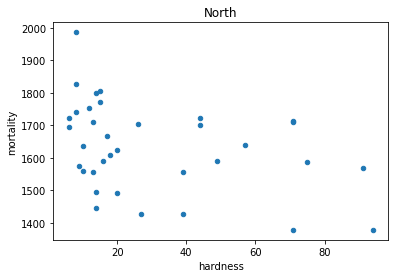

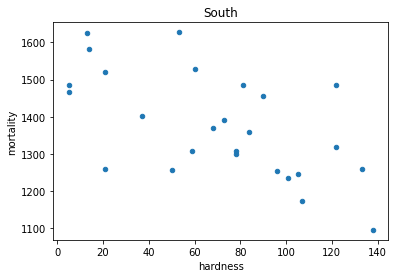

In [3]:
def show_matrix_graph(water_data_frame: pandas.DataFrame,
                      title: str):
    water_data_frame.plot(kind='scatter',
                          x='hardness',
                          y='mortality',
                          title=title)

show_matrix_graph(north_data_frame,
                  title='North')
show_matrix_graph(south_data_frame,
                  title='South')

### Рассчитать коэффициенты корреляции Пирсона и Спирмена

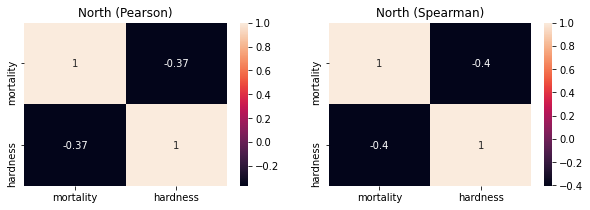

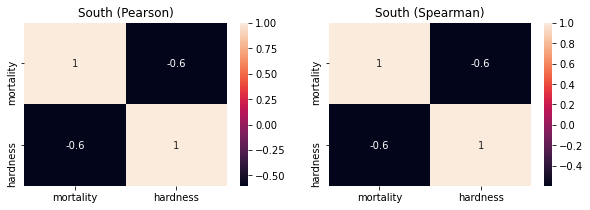

In [4]:
def show_heatmap_matrix_graph(data_frame: pandas.DataFrame,
                              title: str):
    _, (axes1, axes2) = pyplot.subplots(1, 2, figsize=(10, 3))

    axes1.set_title('{} (Pearson)'.format(title))
    axes2.set_title('{} (Spearman)'.format(title))
    seaborn.heatmap(data_frame.corr(),
                    annot=True,
                    ax=axes1)
    seaborn.heatmap(data_frame.corr('spearman'),
                    annot=True,
                    ax=axes2)
show_heatmap_matrix_graph(north_data_frame,
                          title='North')
show_heatmap_matrix_graph(south_data_frame,
                          title='South')

### Построить модель линейной регрессии

In [5]:
north_x_train_values, \
north_x_test_values, \
north_y_train_value, \
north_y_test_value = train_test_split(north_data_frame[['hardness']],
                                      north_data_frame['mortality'],
                                      test_size=0.3,
                                      random_state=404)

north_linear_regression: LinearRegression = LinearRegression().fit(north_x_train_values,
                                                             north_y_train_value)

south_x_train_values, \
south_x_test_values, \
south_y_train_value, \
south_y_test_value = train_test_split(south_data_frame[['hardness']],
                                      south_data_frame['mortality'],
                                      test_size=0.3,
                                      random_state=404)

south_linear_regression: LinearRegression = LinearRegression().fit(south_x_train_values,
                                                                   south_y_train_value)

North 'y' values on test values of 'x' 
[1596.02334384 1661.99959653 1660.16692284 1605.18671227 1605.18671227
 1645.50553335 1627.1787965  1539.21045958 1546.54115432 1649.17088073
 1661.99959653]

South 'y' values on test values of 'x' 
[1271.38982067 1516.13888531 1398.65933428 1361.94697458 1202.86008257
 1337.47206812 1229.78247968 1322.78712424]



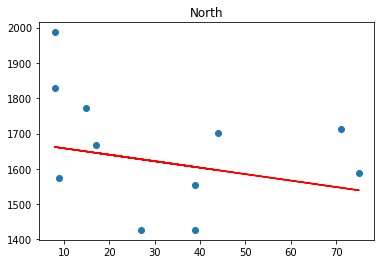

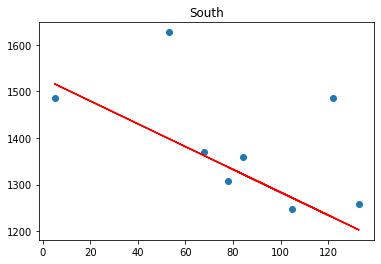

In [6]:
def show_regression(x_values: pandas.DataFrame,
                    y_value: pandas.Series,
                    linear_regression: LinearRegression,
                    title: str):

    y_predict = linear_regression.predict(x_values)
    print("{} 'y' values on test values of 'x' \n{}\n".format(title, y_predict))

    _, axexs = pyplot.subplots()
    axexs.set_title(title)
    pyplot.scatter(x_values,
                   y_value)
    pyplot.plot(x_values,
                linear_regression.predict(x_values),
                c='r')
    pyplot.show()

show_regression(x_values=north_x_test_values,
                y_value=north_y_test_value,
                linear_regression=north_linear_regression,
                title='North')

show_regression(x_values=south_x_test_values,
                y_value=south_y_test_value,
                linear_regression=south_linear_regression,
                title='South')

### Рассчитать коэффициент детерминации

In [7]:
print('North: ', north_linear_regression.score(north_x_test_values,
                                               north_y_test_value))
print('South: ', south_linear_regression.score(south_x_test_values,
                                               south_y_test_value))

North:  0.0448903397074677
South:  -0.035528242810707766


### Вывести график остатков

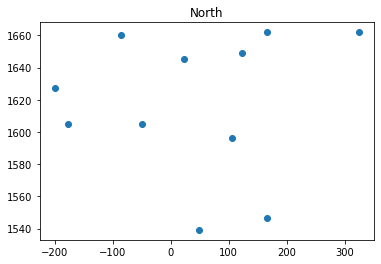

In [8]:
_, axexs = pyplot.subplots()
axexs.set_title('North')
pyplot.scatter(north_y_test_value - north_linear_regression.predict(north_x_test_values),
               north_linear_regression.predict(north_x_test_values))

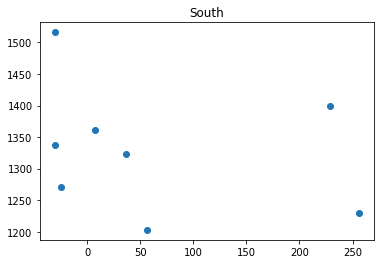

In [9]:
_, axexs = pyplot.subplots()
axexs.set_title('South')
pyplot.scatter(south_y_test_value - south_linear_regression.predict(south_x_test_values),
               south_linear_regression.predict(south_x_test_values))

Так как коэффициент детерминации почти нулевой то можно сказать что данные не связаны.